# Artificial Neural Network

### Importing the libraries

In [457]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Part 1 - Data Preprocessing

### Importing the dataset

In [458]:
dataset = pd.read_csv('Forecast_at_2024_05_24_11_19.csv')
dataset.head()

,forecastTimeUtc,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,totalPrecipitation,conditionCode
0,2024-05-24 08:00:00,24.3,24.3,4,9,131,0,1025,23.0,0.0,clear
1,2024-05-24 09:00:00,25.8,25.8,4,10,121,0,1025,16.0,0.0,clear
2,2024-05-24 10:00:00,26.8,26.8,5,11,127,0,1025,10.0,0.0,clear
3,2024-05-24 11:00:00,27.6,27.6,5,12,135,0,1024,3.0,0.0,clear
4,2024-05-24 12:00:00,27.9,27.9,5,12,137,0,1024,2.0,0.0,clear


In [459]:
X = dataset.iloc[:, 3:].values
y = dataset.iloc[:, 1].values

### Encoding the Independent Variable

In [460]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Taking care of missing data

In [461]:
dataset.isnull().sum()

forecastTimeUtc         0
airTemperature          0
feelsLikeTemperature    0
windSpeed               0
windGust                0
windDirection           0
cloudCover              0
seaLevelPressure        0
relativeHumidity        4
totalPrecipitation      0
conditionCode           0
dtype: int64

In [462]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

### Splitting the dataset into the Training set and Test set

In [463]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Part 2 - Building the ANN

### Initializing the ANN

In [464]:
ann = tf.keras.Sequential()

### Adding the input layer and the first hidden layer

In [465]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [466]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [467]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [468]:
ann.compile(optimizer='adam', loss='mean_squared_error')

### Training the ANN model on the Training set

In [469]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 152.0069
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62.0784 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62.9402 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87.0668 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 79.8905 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.3928 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.1376 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55.9326 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.4005 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.2590 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.6779 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.7022 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.6618 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.5407 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.2904 
Epoc

### Predicting the results of the Test set

In [470]:
y_pred = ann.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


## Evaluating the Model Performance

In [471]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
r2_score

-0.5768899407993524

## Visualising the Artificial Neural Network results with dataframe results

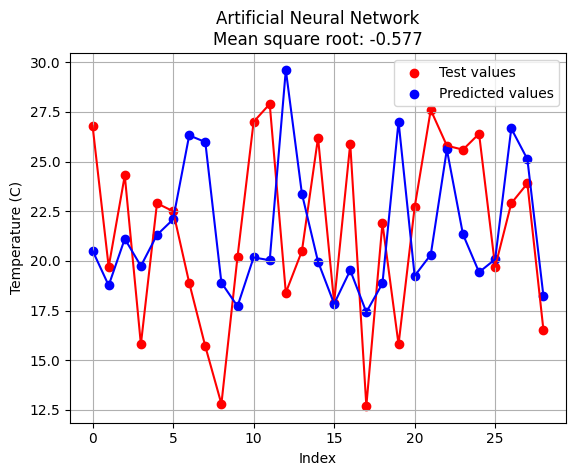

In [472]:
plt.plot(range(0, len(y_test)), y_test, color='red')
plt.scatter(range(0, len(y_test)), y_test, color='red', label='Test values')
plt.plot(range(0, len(y_pred)), y_pred, color='blue')
plt.scatter(range(0, len(y_pred)), y_pred, color='blue', label='Predicted values')
plt.title(str(round(r2_score,3)))
plt.title('Artificial Neural Network'+'\n'+'Mean square root: '+str(round(r2_score,3)))
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.grid()
plt.legend()
plt.show()

In [473]:
#4 = 0.7654997695214831